<a href="https://colab.research.google.com/github/Mayuravarsha/Cipher-and-Decipher-using-C/blob/master/DA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing the data

In [69]:
from datetime import datetime
print('Process start time :', datetime.now())
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/archive(2).zip
!unzip gdrive/My\ Drive/archive(2).zip > /dev/null


Process start time : 2021-12-05 10:23:54.384473
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip gdrive/My\ Drive/archive(2).zip'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip gdrive/My\ Drive/archive(2).zip > /dev/null'


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/gdrive/MyDrive/archive (2)/vehicles.csv')

In [71]:
df.shape

(426880, 26)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [73]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [74]:
pd.set_option('display.max_columns', None)

In [75]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Data Cleaning

In [76]:
# Remove column - 'url' since the details present in url is already available in 
# columns - 'region', 'county', 'state'
df = df.drop('url', axis=1)

In [77]:
df['region_url'].unique()[:10]

array(['https://prescott.craigslist.org', 'https://fayar.craigslist.org',
       'https://keys.craigslist.org', 'https://worcester.craigslist.org',
       'https://greensboro.craigslist.org',
       'https://hudsonvalley.craigslist.org',
       'https://medford.craigslist.org', 'https://erie.craigslist.org',
       'https://elpaso.craigslist.org',
       'https://bellingham.craigslist.org'], dtype=object)

In [78]:
# The county column only has 'nan' in it. Therefore, take the county name from 'region_url' column.
df['county'].unique()

array([nan])

In [79]:
# Updating 'county' from 'region_from_url' column.
df['county'] = df['region_url'].str.replace('https://','').str.replace('.craigslist.org','')

In [80]:
# Dropping column - region_url
df = df.drop('region_url', axis=1)
# Finding the unique list of manufacturers. There are NULL values.
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [81]:
model_df = df.loc[df['manufacturer'].isnull(), ['model']]
model_df['model'].unique()[:50]

array([nan, 'Scion iM Hatchback 4D', 'blue bird bus', '1966 C-30 1 ton',
       'smart fortwo Passion Hatchback', 'F-350', 'lac XT5 Crossover',
       'Sterling Acterra', 'Freightliner Cascadia', 'Maserati Levante',
       'SPECIAL FINANCE PROGRAM 2020', '1987 Saab 900 Turbo',
       'Suzuki XL-7', 'Series', 'scion ia', '1988', 'plymouth voyager',
       'oldsmobile cutlass', 'INTERNATIONAL 4700 DUMP', 'smart fortwo',
       'r XF', '2002 limited 4 runner', 'LBZ Duramax',
       '2002   Corvette Convertible', 'Genesis G80', 'ai Santa Fe',
       'FordE450', 'des-Benz CLA', 'HUMMER H2', 'a Camry',
       'Isuzu NPR HD GAS REG', 'Hino 268', 'International TerraStar',
       'Freightliner M2 106 Medium Duty', 'Blue Bird All American',
       'Isuzu NPR HD GAS CREW', 'Isuzu NPR', 'Workhorse W42', 'he Macan',
       'HUMMER H2 Lifted 4x4', 'des-Benz E-Class', 'Kenworth T300',
       'CX-5', 'Freightliner', 'AutoCar flatbed truck',
       'olet Express Commercial Cutaway', 'AM GENERAL HUMMER

In [82]:
model_df.shape

(17646, 1)

In [83]:
df.shape


(426880, 24)

In [84]:
# Update 'manufacturer' to 'other' when its NULL
df.loc[df['manufacturer'].isnull(), ['manufacturer']] = 'other'
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prescott,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fayar,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keys,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,worcester,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,greensboro,nc,NaN,NaN,NaN


In [85]:
df[df['region'].isnull() == True]


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date


In [86]:
df['region'].unique()[:10]


array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham'], dtype=object)

In [87]:
# Removing all records which has price = 0.
df = df[df['price'] != 0]
df['year'].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1990., 1965.,
       1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980., 1967.,
       1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934., 1952.,
       1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022., 1901.,
       1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935., 1918.,
       1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915., 1945.,
       1902., 1905., 1920., 1944., 1910., 1909.])

In [88]:
# There are 82 records that have year higher than current year ie) 2020. They have to be removed as well.
df[df['year'] > 2020].shape

(2078, 24)

In [89]:
df = df[df['year'] < 2020]
# 'model' column has lot of inconsistent data eg). Anything, sequoia limited, 30 YEARS.EXP.
df['model'].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'tundra double cab sr', ..., 'gand wagoneer', '96 Suburban',
       'Paige Glenbrook Touring'], dtype=object)

In [90]:
# Dropping the columns - latitude, longitude
df = df.drop(['lat','long'], axis=1)
len(df)

372927

In [91]:
# Identifying the no.of missing values in each column and their percentage compared to total.
missing_vals = df.isnull().sum().sort_values(ascending = False)
(missing_vals/len(df))*100

size            70.693996
VIN             39.967876
cylinders       39.776686
condition       38.520407
drive           30.222001
paint_color     29.902367
type            22.269774
title_status     1.835748
model            1.214447
fuel             0.597436
odometer         0.579470
transmission     0.453976
description      0.000268
manufacturer     0.000000
price            0.000000
year             0.000000
region           0.000000
posting_date     0.000000
state            0.000000
image_url        0.000000
county           0.000000
id               0.000000
dtype: float64

In [92]:
# Removing rows which has less than 5% of NULLs in columns.
df=df.dropna(subset=['model','fuel','transmission','title_status','description'])
df.shape

(358654, 22)

In [93]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-04T12:31:08-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-04T10:41:31-0500
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,auburn,al,2021-05-03T14:02:03-0500
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-03T13:41:25-0500


In [94]:
df['cylinders'].unique()


array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders', 'other'],
      dtype=object)

In [95]:
df['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'hatchback', 'mini-van',
       'SUV', 'sedan', 'offroad', 'bus', 'convertible', 'wagon', 'van'],
      dtype=object)

In [96]:
# Using forward fill for the columns - 'paint_color', 'drive', 'cylinders', 'type'
df['type'] = df['type'].fillna(method='ffill')
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       136517
cylinders            0
fuel                 0
odometer          1903
title_status         0
transmission         0
VIN             145684
drive                3
size            251182
type                 0
paint_color          0
image_url            0
description          0
county               0
state                0
posting_date         0
dtype: int64

In [97]:
df['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', nan, 'new', 'salvage'],
      dtype=object)

In [98]:
# Updating the condition as 'new' for all vehicles whose year is 2019 and above
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.groupby(['condition']).count()['year']

condition
excellent     87560
fair           6454
good         108026
like new      18891
new            8893
salvage         568
Name: year, dtype: int64

In [99]:
df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       128262
cylinders            0
fuel                 0
odometer          1903
title_status         0
transmission         0
VIN             145684
drive                3
size            251182
type                 0
paint_color          0
image_url            0
description          0
county               0
state                0
posting_date         0
dtype: int64

In [100]:
# Addressing the NULLs in 'odometer' column.

# Since odometer is related to the condition of the vehicle, it can be used to fill the missing odometer values.
# The mean of odometer values for each condition is calculated and is used to fill the NULL values for those 
# corresponding condition.
# Find the total distinct values for 'condition'
conditions = list(df['condition'].unique())
conditions.pop(3) # removing null value from list
conditions

['good', 'excellent', 'fair', nan, 'new', 'salvage']

In [101]:
# Find the corresponding mean value of 'odometer' for each value in 'condition'
mean_odometer_per_condition_df = df.groupby('condition').mean()['odometer'].reset_index()
mean_odometer_per_condition_df

,condition,odometer
0,excellent,109816.415651
1,fair,219937.181593
2,good,89763.987161
3,like new,87025.739294
4,new,36309.288262
5,salvage,244983.404930


In [102]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 87025.74
Excellent average odometer: 109816.42
Good average odometer: 89763.99
Fair average odometer: 219937.18
Salvage average odometer: 244983.4


In [103]:
# Update the 'condition' based on the average 'odometer' values for each 'condition'

df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [104]:
# 'model' can be related to 'size'.
# checking the sizes for model = 'patriot'
df.loc[df['model'] == 'patriot', 'size'].unique()

#There are more than 1 size for the same model. Therefore, this column is not reliable and has to be removed. 
# The car details can be scrapped from a different source and then combined to populate the correct car features.

array([nan, 'mid-size', 'compact', 'full-size', 'sub-compact'],
      dtype=object)

In [105]:
# dropping the column - 'size' since its not reliable
# dropping the column - 'id' since it doesn't have any meaning
# dropping the column - 'image_url' since it doesn't have any meaning
# dropping the column - 'vin' since it doesn't have any meaning
# dropping the column - 'description' - few rows contain important details. dropping for now.

df = df.drop(['size','id','image_url','VIN','description'], axis = 1)

Exploratory Data Analysis

In [106]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of vehicles listed on craigslist across different conditions')

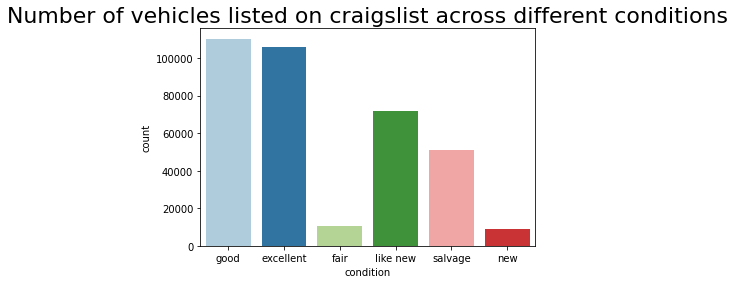

In [107]:
# Condition of cars listed on Craigslist
sns.countplot(x='condition', data=df, palette=("Paired"))
plt.title('Number of vehicles listed on craigslist across different conditions', fontsize=22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


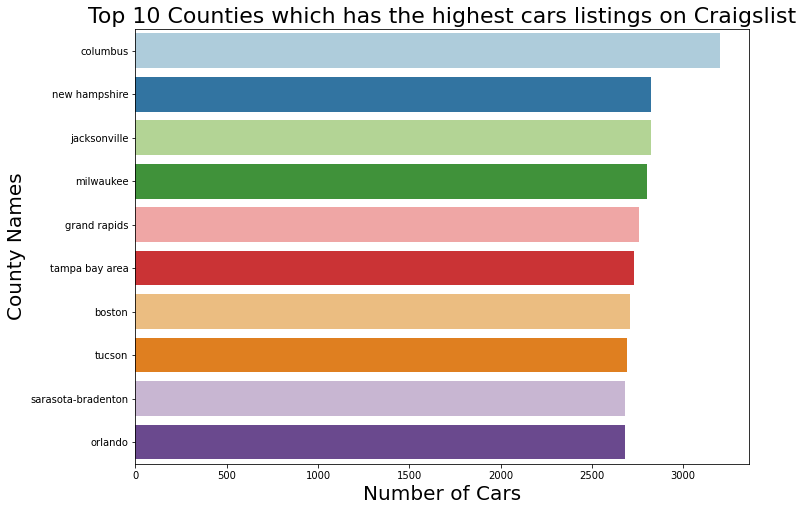

In [108]:
# Counties which have the highest number of listings
region_count  = df['region'].value_counts()
region_count = region_count[:10,]
plt.figure(figsize=(11,8))
sns.barplot(region_count.values, region_count.index, alpha=1,palette=("Paired"))
plt.title('Top 10 Counties which has the highest cars listings on Craigslist', fontsize=22)
plt.xlabel('Number of Cars', size="20")
plt.ylabel('County Names', size="20")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


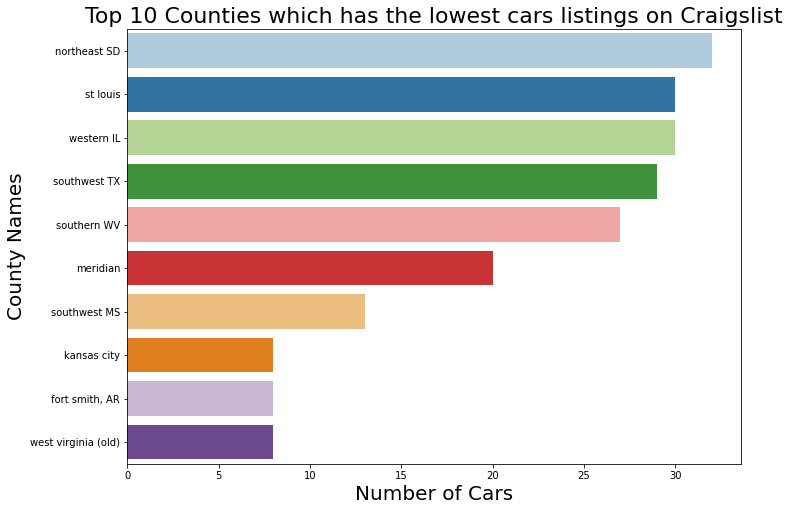

In [109]:
# Counties which have the lowest number of listings
region_count  = df['region'].value_counts()
region_count = region_count[-10:,]
plt.figure(figsize=(11,8))
sns.barplot(region_count.values, region_count.index, alpha=1,palette=("Paired"))
plt.title('Top 10 Counties which has the lowest cars listings on Craigslist', fontsize=22)
plt.xlabel('Number of Cars', size="20")
plt.ylabel('County Names', size="20")
plt.show()

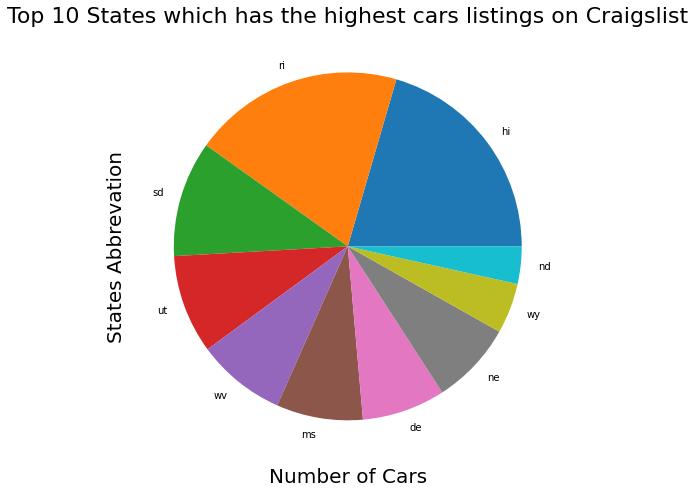

In [110]:
# States have the highest number of listings 
state_count  = df['state'].value_counts()
state_count = state_count[-10:,]
plt.figure(figsize=(11,8))
state_count.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Top 10 States which has the highest cars listings on Craigslist', fontsize=22)
plt.xlabel('Number of Cars', size="20")
plt.ylabel('States Abbrevation', size="20")
plt.show()


In [111]:
# Top Counties in terms of total price of all cars
top_priced_counties = df.groupby('county').sum()['price'].reset_index().sort_values('price', ascending=False)[:10]
top_priced_counties

,county,price
177,knoxville,3780574747
107,eugene,3773065547
344,southjersey,3062145134
86,delaware,3038550621
123,frederick,1414453614
156,indianapolis,1271503013
152,humboldt,1117282161
346,spokane,189120861
13,asheville,156210123
1,akroncanton,150549245


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


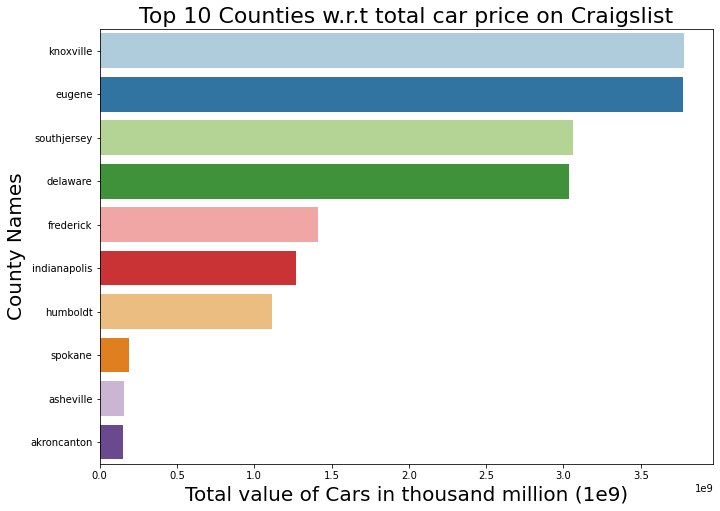

In [112]:
plt.figure(figsize=(11,8))
sns.barplot(top_priced_counties.price, top_priced_counties.county, alpha=1,palette=("Paired"))
plt.title('Top 10 Counties w.r.t total car price on Craigslist', fontsize=22)
plt.xlabel('Total value of Cars in thousand million (1e9)', size="20")
plt.ylabel('County Names', size="20")
plt.show()

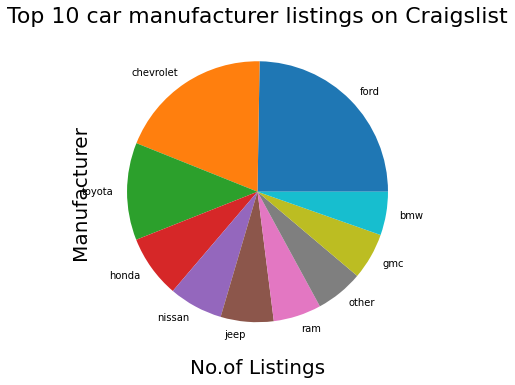

In [113]:
# Manufacturer's cars which are the most listed ones
manufacturer_count = df['manufacturer'].value_counts().iloc[:10]
plt.figure(figsize=(10,6))
manufacturer_count.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Top 10 car manufacturer listings on Craigslist', fontsize=22)
plt.xlabel('No.of Listings', size="20")
plt.ylabel('Manufacturer', size="20")
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358654 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        358654 non-null  object 
 1   price         358654 non-null  int64  
 2   year          358654 non-null  float64
 3   manufacturer  358654 non-null  object 
 4   model         358654 non-null  object 
 5   condition     358164 non-null  object 
 6   cylinders     358654 non-null  object 
 7   fuel          358654 non-null  object 
 8   odometer      356751 non-null  float64
 9   title_status  358654 non-null  object 
 10  transmission  358654 non-null  object 
 11  drive         358651 non-null  object 
 12  type          358654 non-null  object 
 13  paint_color   358654 non-null  object 
 14  county        358654 non-null  object 
 15  state         358654 non-null  object 
 16  posting_date  358654 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usag

In [115]:
df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders', 'other'],
      dtype=object)

In [116]:
df['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [117]:
df['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

Feature Preprocessing

In [118]:
# Removing region since we already have 'county'
df=df.drop('region', axis=1)
# Removing rows which has NULLs in conditon and odometer.
df=df.dropna(subset=['odometer','condition'])
# Identify the no.of missing values in each column and their percentage compared to total.
missing_vals = df.isnull().sum().sort_values(ascending = False)
(missing_vals/len(df))*100

drive           0.000841
posting_date    0.000000
state           0.000000
county          0.000000
paint_color     0.000000
type            0.000000
transmission    0.000000
title_status    0.000000
odometer        0.000000
fuel            0.000000
cylinders       0.000000
condition       0.000000
model           0.000000
manufacturer    0.000000
year            0.000000
price           0.000000
dtype: float64

In [119]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# convert characters to numbers using label Encoding
df[['county','manufacturer', 'model', 'condition','cylinders', 'fuel', 'title_status', 'transmission','drive', 'type', 'paint_color', 'state']] = df[['county','manufacturer', 'model', 'condition','cylinders', 'fuel', 'title_status', 'transmission','drive','type', 'paint_color', 'state']].apply(le.fit_transform)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,county,state,posting_date
27,33590,2014.0,14,21084,2,6,2,57923.0,0,2,3,8,10,18,1,2021-05-04T12:31:18-0500
28,22590,2010.0,7,21414,2,6,2,71229.0,0,2,3,8,1,18,1,2021-05-04T12:31:08-0500
30,30990,2017.0,39,23993,2,6,2,41124.0,0,2,3,8,8,18,1,2021-05-04T10:41:31-0500
31,15000,2013.0,13,12704,0,5,2,128000.0,0,0,2,10,0,18,1,2021-05-03T14:02:03-0500
32,27990,2012.0,14,21187,2,6,2,68696.0,0,2,0,8,0,18,1,2021-05-03T13:41:25-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426873,30990,2018.0,26,14932,2,6,2,15080.0,0,0,2,7,10,406,50,2021-04-04T03:21:35-0600
426874,33590,2018.0,23,15289,2,5,2,30814.0,0,0,2,9,10,406,50,2021-04-04T03:21:34-0600
426875,23590,2019.0,30,17267,2,5,2,32226.0,0,2,1,9,10,406,50,2021-04-04T03:21:31-0600
426878,28990,2018.0,23,11885,2,5,2,30112.0,0,2,1,9,9,406,50,2021-04-04T03:21:11-0600


Handling continous values - Scaling down

In [120]:
df["odometer"] = np.sqrt(preprocessing.minmax_scale(df["odometer"]))


In [121]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,county,state,posting_date
27,33590,2014.0,14,21084,2,6,2,0.076107,0,2,3,8,10,18,1,2021-05-04T12:31:18-0500
28,22590,2010.0,7,21414,2,6,2,0.084397,0,2,3,8,1,18,1,2021-05-04T12:31:08-0500
30,30990,2017.0,39,23993,2,6,2,0.064128,0,2,3,8,8,18,1,2021-05-04T10:41:31-0500
31,15000,2013.0,13,12704,0,5,2,0.113137,0,0,2,10,0,18,1,2021-05-03T14:02:03-0500
32,27990,2012.0,14,21187,2,6,2,0.082883,0,2,0,8,0,18,1,2021-05-03T13:41:25-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426873,30990,2018.0,26,14932,2,6,2,0.038833,0,0,2,7,10,406,50,2021-04-04T03:21:35-0600
426874,33590,2018.0,23,15289,2,5,2,0.055510,0,0,2,9,10,406,50,2021-04-04T03:21:34-0600
426875,23590,2019.0,30,17267,2,5,2,0.056768,0,2,1,9,10,406,50,2021-04-04T03:21:31-0600
426878,28990,2018.0,23,11885,2,5,2,0.054874,0,2,1,9,9,406,50,2021-04-04T03:21:11-0600


Train Test Split


In [122]:
# Seperate Features and Outcome
X = df.drop('price',axis=1).values
y = df.price.values
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# works for classification
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


TRAIN: [   252    792    896 ... 356748 356749 356750] TEST: [     0      1      2 ... 356355 356363 356399]
TRAIN: [     0      1      2 ... 356355 356363 356399] TEST: [   252    792    896 ... 356748 356749 356750]


In [123]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(178376, 15) (178376,) (178375, 15) (178375,)


In [124]:
X_train=X_train[:,:14]
X_test=X_test[:,:14]

Different Models For Testing

In [125]:
# Create a dataframe to store accuracy scores of different algorithms
accuracy_df = pd.DataFrame(columns=('r2', 'rmse'))

In [126]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error as MSE

# Fit
model = DecisionTreeRegressor()
model.fit(X_train[:,:14], y_train)

# Predict
y_pred = model.predict(X_test[:,:14])

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Decision Tree Baseline']))
accuracy_df

,r2,rmse
Decision Tree Baseline,-55.46,88418259.01


In [127]:
from sklearn.model_selection import GridSearchCV

scoring = metrics.make_scorer(metrics.mean_squared_error)

param_grid = {
'criterion':['mse'] 
,'splitter':['best','random']
,'max_depth':[4, 5, 6, 7, 8]
,'min_samples_split':[0.8, 2]
,'max_features':['auto','sqrt','log2']
}
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),param_grid=param_grid,scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse'], 'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0.8, 2],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(mean_squared_error))

In [128]:
#Decision Tree with auto Hyper Parameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

scoring = metrics.make_scorer(metrics.mean_squared_error)

param_grid = {
'criterion':['mse'] 
,'splitter':['best','random']
,'max_depth':[4, 5, 6, 7, 8]
,'min_samples_split':[0.8, 2]
,'max_features':['auto','sqrt','log2']
}

g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),param_grid=param_grid,scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train[:,:14], y_train)
g_cv.best_params_
result = g_cv.cv_results_
# print(result)

# Predict
y_pred = g_cv.best_estimator_.predict(X_test[:,:14])

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Decision Tree HyperParam Tuning']))
accuracy_df.sort_values('rmse')

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

,r2,rmse
Decision Tree HyperParam Tuning,-0.57,14728047.11
Decision Tree Baseline,-55.46,88418259.01


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Random Forest Baseline']))
accuracy_df.sort_values('rmse')

In [ ]:
#Random Forest with auto Hyper Parameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV scoring = metrics.make_scorer(metrics.mean_squared_error) param_grid = { # 'n_estimators':[50,70,100,120,130] # 'max_features':['auto','sqrt','log2'] #,'oob_score':[False, True] # whether to use out-of-bag samples to estimate the R^2 on unseen data. # ,'bootstrap':[False, True] # ,'random_state':[10, None] # ,'warm_start':[True, False] 'max_depth':[4, 5, 6, 7, 8] # ,'min_samples_split':[0.8, 2, 3] } g_cv = GridSearchCV(RandomForestRegressor(random_state=0),param_grid=param_grid,scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train, y_train) g_cv.best_params_ result = g_cv.cv_results_ 
# print(result) 
# Predict y_pred = g_cv.best_estimator_.predict(X_test) # Metrics r2 = round(metrics.r2_score(y_test, y_pred),2) rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2) accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Random Forest HyperParam Tuning']))
accuracy_df

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Fit
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Gradient Boosting Baseline']))
accuracy_df.sort_values('rmse')

In [ ]:
#XGBoost
from xgboost import XGBRegressor

# Fit
model = XGBRegressor(random_state=0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['XGBoost Baseline']))
accuracy_df.sort_values('rmse')


In [ ]:
#XGBoost with Parameters
import xgboost as xgb

model = xgb.XGBRegressor(
#     gamma=1,                 
    learning_rate=0.05,
#     max_depth=3,
#     n_estimators=10000,                                                                    
#     subsample=0.8,
    random_state=34,
    booster='gbtree',    
    objective='reg:squarederror',
    eval_metric='rmse'
) 
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['XGBoost with Parameters']))
accuracy_df.sort_values('rmse')

In [ ]:
#MLP Regressor
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
param_grid = {
#               'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
#               'learning_rate': ['constant'],
#               'learning_rate_init': [0.01],
#               'power_t': [0.5],
#               'alpha': [0.0001],
#               'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]
}
model = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, verbose=True, pre_dispatch='2*n_jobs')

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['MLPRegressor with Parameter Tuning']))
accuracy_df.sort_values('rmse')

In [ ]:
#LightGBM
#Splitting the training data in to training and validation datasets for Model training

import lightgbm as lgb
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
#         'max_depth': -1,
#         'subsample': 0.8,
#         'bagging_fraction' : 1,
#         'max_bin' : 5000 ,
#         'bagging_freq': 20,
#         'colsample_bytree': 0.6,
        'metric': 'rmse',
#         'min_split_gain': 0.5,
#         'min_child_weight': 1,
#         'min_child_samples': 10,
#         'scale_pos_weight':1,
#         'zero_as_missing': False,
#         'seed':0,        
    }
model = lgb.train(params, train_set = train_set, num_boost_round=10000,early_stopping_rounds=8000,
                  verbose_eval=500, valid_sets=valid_set)


y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['LightGBM with Parameters']))
accuracy_df.sort_values('rmse')

LightGBM with categorical variables

In [ ]:
#Splitting the training data in to training and validation datasets for Model training

import lightgbm as lgb1
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Define categorical features, training and validation data
categorical_positions = []
cat = ['manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','county','state']
for c, col in enumerate(df.columns):
    for x in cat:
        if col == x:
            categorical_positions.append(c-1)


train_set = lgb1.Dataset(Xtrain, label=Ztrain, categorical_feature=categorical_positions)
valid_set = lgb1.Dataset(Xval, label=Zval)

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
#         'max_depth': -1,
#         'subsample': 0.8,
#         'bagging_fraction' : 1,
#         'max_bin' : 5000 ,
#         'bagging_freq': 20,
#         'colsample_bytree': 0.6,
        'metric': 'rmse',
#         'min_split_gain': 0.5,
#         'min_child_weight': 1,
#         'min_child_samples': 10,
#         'scale_pos_weight':1,
#         'zero_as_missing': False,
#         'seed':0,        
    }
model = lgb1.train(params, train_set = train_set, num_boost_round=10000,early_stopping_rounds=8000,
                  verbose_eval=500, valid_sets=valid_set)


y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['LightGBM with Categories & Parameters']))
accuracy_df.sort_values('rmse')

In [ ]:
#CatBoost
from catboost import CatBoostRegressor, Pool
    
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

train_set = lgb.Dataset(Xtrain, Ztrain)
valid_set = lgb.Dataset(Xval, Zval)

model = CatBoostRegressor()

model.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], verbose=100, early_stopping_rounds=1000)

y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['CatBoost Baseline']))
accuracy_df.sort_values('rmse')

In [ ]:
#CatBoost with Parameters
from catboost import CatBoostRegressor, Pool
    
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)


        
model = CatBoostRegressor(
                          iterations=1000, 
                          depth=8, 
                          learning_rate=0.01, 
                          loss_function='RMSE', 
                          eval_metric='RMSE', 
                          use_best_model=True)

model.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], verbose=100, early_stopping_rounds=1000)

y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
# accuracy_df = accuracy_df.drop('CatBoost Parameter Tuning')
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['CatBoost Parameter Tuning']))
accuracy_df.sort_values('rmse')

In [ ]:
#Plotting the RMSE Scores
# Plot
plt.figure(figsize=[25,6])
plt.tick_params(labelsize=14)
plt.plot(accuracy_df.index, accuracy_df['rmse'], label = 'RMSE Scores')
plt.legend()
plt.title('RMSE Score comparison for 10 popular models for test dataset')
plt.xlabel('Models')
plt.ylabel('RMSE Scores')
plt.xticks(accuracy_df.index, rotation='vertical')
plt.savefig('graph.png')
plt.show()
print('Process start time :', datetime.now())

Save Model

In [ ]:
# Rerunning MLP Neural Network to save the model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV


mlp = MLPRegressor()
param_grid = {
#               'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
#               'learning_rate': ['constant'],
#               'learning_rate_init': [0.01],
#               'power_t': [0.5],
#               'alpha': [0.0001],
#               'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]
}
model = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, pre_dispatch='2*n_jobs')

model.fit(X_train, y_train)

In [ ]:
# Save the neural network model
from joblib import dump, load

filename = 'mlp_neural_network_001.joblib'
with open(filename, 'wb') as file:  
    dump(model, file)
# Predict
y_pred = model.predict(X_test)
df1 = pd.DataFrame({"y":y_test,"y_pred":y_pred })
df1.head(50)